In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data\lotwize_case.csv')

In [4]:
df.shape

(9142, 356)

In [5]:
df.head()

,schools/0/distance,schools/1/grades,schools/2/level,schools/0/name,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Condo,CA,2.0,2.0,1555.0,Square Feet,sqft,1555.0,111718685.0,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tile
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hardwood
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['price'] #what we are predicting?

0       1500000
1       1675000
2       2400000
3       1475000
4       1170000
         ...   
9137     690000
9138     700000
9139     785000
9140     709000
9141     707000
Name: price, Length: 9142, dtype: int64

<Axes: >

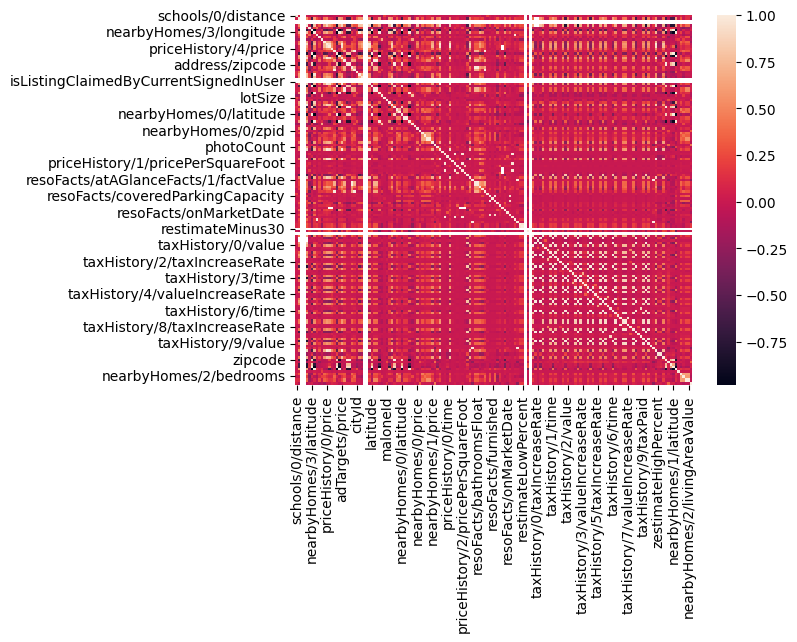

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot = False)

In [8]:
predictors = df.columns.tolist()

In [9]:
df['monthlyHoaFee'].value_counts()

monthlyHoaFee
300.0     44
360.0     32
390.0     32
450.0     31
150.0     31
          ..
1093.0     1
1086.0     1
1055.0     1
876.0      1
790.0      1
Name: count, Length: 696, dtype: int64

In [10]:
predictors

['schools/0/distance',
 'schools/1/grades',
 'schools/2/level',
 'schools/0/name',
 'schools/1/rating',
 'schools/2/size',
 'schools/0/totalCount',
 'schools/1/type',
 'county',
 'isRentalListingOffMarket',
 'mortgageRates/thirtyYearFixedRate',
 'propertyTypeDimension',
 'monthlyHoaFee',
 'nearbyHomes/3/latitude',
 'nearbyHomes/3/longitude',
 'resoFacts/constructionMaterials/0',
 'resoFacts/flooring/1',
 'resoFacts/rooms/1/roomFeatures/0',
 'resoFacts/propertyCondition',
 'resoFacts/foundationDetails/0',
 'resoFacts/architecturalStyle',
 'resoFacts/fencing',
 'resoFacts/utilities/0',
 'resoFacts/view/0',
 'resoFacts/rooms/1/roomType',
 'resoFacts/storiesTotal',
 'resoFacts/interiorFeatures/0',
 'resoFacts/listingTerms',
 'resoFacts/communityFeatures/0',
 'resoFacts/fireplaces',
 'resoFacts/patioAndPorchFeatures/0',
 'resoFacts/patioAndPorchFeatures/1',
 'resoFacts/patioAndPorchFeatures/2',
 'nearbyHomes/0/homeStatus',
 'nearbyHomes/1/lotAreaValue',
 'nearbyHomes/2/price',
 'nearbyHomes

In [11]:
predictors.remove('zestimate')

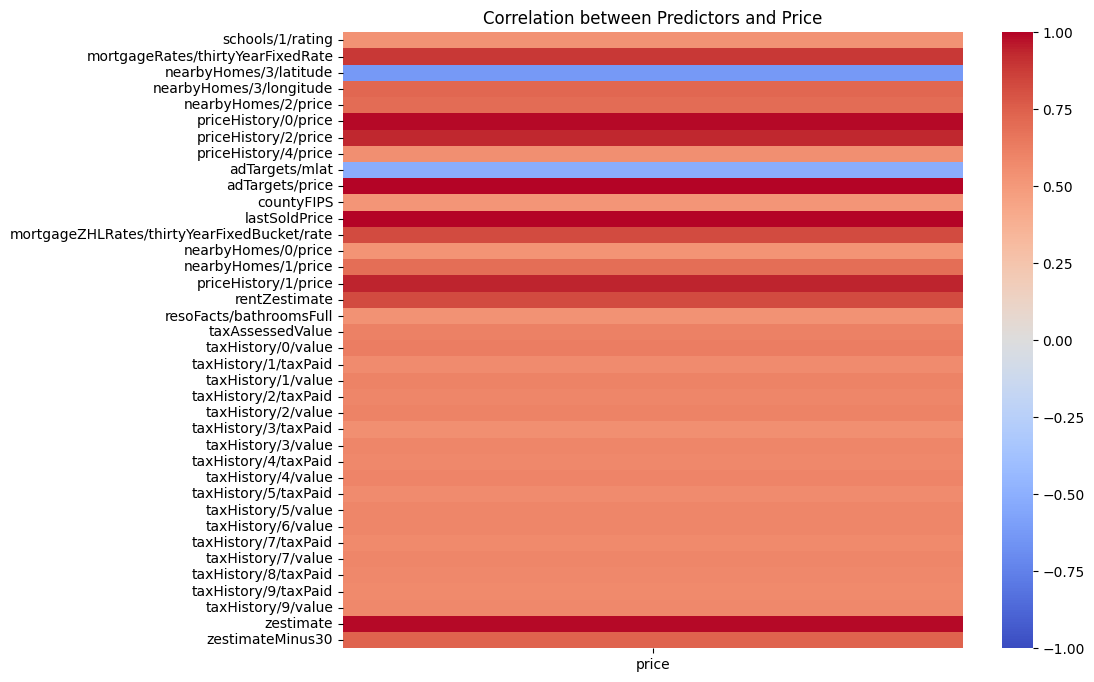

In [12]:
corr_matrix = df.corr(numeric_only=True)

# Extract the correlations with 'zestimate'
zestimate_corr = corr_matrix[['price']].drop('price')
# Filter out correlations between 0.5 and -0.5
filtered_corr = zestimate_corr[(zestimate_corr['price'] >= 0.5) | (zestimate_corr['price'] <= -0.5)]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Predictors and Price')
plt.show()
#looking at coorelation between predictors and price, only variables outside of 0.5 and -.5 coorelation

In [13]:
# Get the list of variables to keep
variables_to_keep = filtered_corr.index.tolist()

# Add 'zestimate' to the list of variables to keep
variables_to_keep.append('price')

# Filter the DataFrame to keep only the relevant variables
filtered_df = df[variables_to_keep]

# Display the filtered DataFrame
print(filtered_df.head())
#this filtered dataframe only has variables outside of 0.5 to -0.5 coorelation

   schools/1/rating  mortgageRates/thirtyYearFixedRate  \
0               NaN                                NaN   
1               NaN                                NaN   
2               NaN                                NaN   
3               NaN                                NaN   
4               NaN                                NaN   

   nearbyHomes/3/latitude  nearbyHomes/3/longitude  nearbyHomes/2/price  \
0                     NaN                      NaN            1144900.0   
1                     NaN                      NaN                  NaN   
2                     NaN                      NaN                  NaN   
3                     NaN                      NaN                  NaN   
4                     NaN                      NaN                  NaN   

   priceHistory/0/price  priceHistory/2/price  priceHistory/4/price  \
0             1500000.0             1299000.0                   NaN   
1                   NaN                   NaN             

In [14]:
filtered_df.columns

Index(['schools/1/rating', 'mortgageRates/thirtyYearFixedRate',
       'nearbyHomes/3/latitude', 'nearbyHomes/3/longitude',
       'nearbyHomes/2/price', 'priceHistory/0/price', 'priceHistory/2/price',
       'priceHistory/4/price', 'adTargets/mlat', 'adTargets/price',
       'countyFIPS', 'lastSoldPrice',
       'mortgageZHLRates/thirtyYearFixedBucket/rate', 'nearbyHomes/0/price',
       'nearbyHomes/1/price', 'priceHistory/1/price', 'rentZestimate',
       'resoFacts/bathroomsFull', 'taxAssessedValue', 'taxHistory/0/value',
       'taxHistory/1/taxPaid', 'taxHistory/1/value', 'taxHistory/2/taxPaid',
       'taxHistory/2/value', 'taxHistory/3/taxPaid', 'taxHistory/3/value',
       'taxHistory/4/taxPaid', 'taxHistory/4/value', 'taxHistory/5/taxPaid',
       'taxHistory/5/value', 'taxHistory/6/value', 'taxHistory/7/taxPaid',
       'taxHistory/7/value', 'taxHistory/8/taxPaid', 'taxHistory/9/taxPaid',
       'taxHistory/9/value', 'zestimate', 'zestimateMinus30', 'price'],
      dtype='ob

In [15]:
filtered_df.shape

(9142, 39)

In [16]:
# Remove rows with any null values
filtered_df = filtered_df.dropna()

In [17]:
filtered_df.shape

(46, 39)

In [18]:
filtered_df

,schools/1/rating,mortgageRates/thirtyYearFixedRate,nearbyHomes/3/latitude,nearbyHomes/3/longitude,nearbyHomes/2/price,priceHistory/0/price,priceHistory/2/price,priceHistory/4/price,adTargets/mlat,adTargets/price,...,taxHistory/5/value,taxHistory/6/value,taxHistory/7/taxPaid,taxHistory/7/value,taxHistory/8/taxPaid,taxHistory/9/taxPaid,taxHistory/9/value,zestimate,zestimateMinus30,price
3299,4.0,6.194,36.846855,-119.857430,1164700.0,2300000.0,1795000.0,1795000.0,36.846410,2300000.0,...,1632000.0,994500.0,11875.24,975000.0,11706.32,12176.22,1014600.0,2310700.0,2128371.0,2300000
3741,5.0,5.527,36.702200,-119.545790,286800.0,295000.0,307500.0,315000.0,36.702220,295000.0,...,69446.0,68086.0,826.22,66752.0,777.56,783.94,64462.0,295200.0,309180.0,295000
3747,7.0,5.527,36.828850,-119.893260,369900.0,392000.0,385000.0,350000.0,36.828830,392000.0,...,126329.0,123853.0,1554.94,121425.0,1435.50,1429.56,117258.0,393600.0,388155.0,392000
3761,8.0,5.527,36.844112,-119.692024,472400.0,469000.0,459000.0,257200.0,36.843994,469000.0,...,274868.0,269480.0,3277.30,264197.0,3170.92,3111.14,255127.0,469300.0,462440.0,469000
3788,2.0,5.527,36.781580,-119.794870,227900.0,290000.0,1487.0,1495.0,36.781900,290000.0,...,106742.0,104650.0,1312.66,102599.0,710.20,1251.06,99079.0,372300.0,355680.0,290000
3834,6.0,5.527,36.811188,-119.679560,368400.0,335000.0,329000.0,329000.0,36.811530,335000.0,...,229452.0,224954.0,2087.80,175000.0,1940.86,1921.62,163400.0,337700.0,0.0,335000
3835,6.0,5.527,36.811535,-119.680120,367800.0,410000.0,419900.0,430000.0,36.811188,410000.0,...,238771.0,234090.0,2731.58,229500.0,2639.16,1607.96,136447.0,411900.0,419042.0,410000
3847,6.0,5.527,37.198110,-119.771130,412800.0,311000.0,288900.0,288900.0,37.198840,311000.0,...,290598.0,229738.0,2357.00,225234.0,2357.00,2107.98,217504.0,417700.0,437980.0,311000
3855,6.0,5.527,36.802780,-119.760140,327600.0,370000.0,375000.0,385000.0,36.802470,370000.0,...,120338.0,117980.0,1470.64,115668.0,1422.60,1401.22,111699.0,371200.0,371747.0,370000
3872,2.0,5.527,36.767930,-119.802120,316500.0,324000.0,1650.0,225000.0,36.767925,324000.0,...,294500.0,288900.0,3404.48,270000.0,3111.44,2812.84,225800.0,416800.0,454087.0,324000


In [19]:
predictors = ['schools/1/rating',
'mortgageRates/thirtyYearFixedRate',
'nearbyHomes/1/price',
'bathrooms',
'homeType',
'state',
'adTargets/sqft',
'zipcode',
'bedrooms',
'price'
]

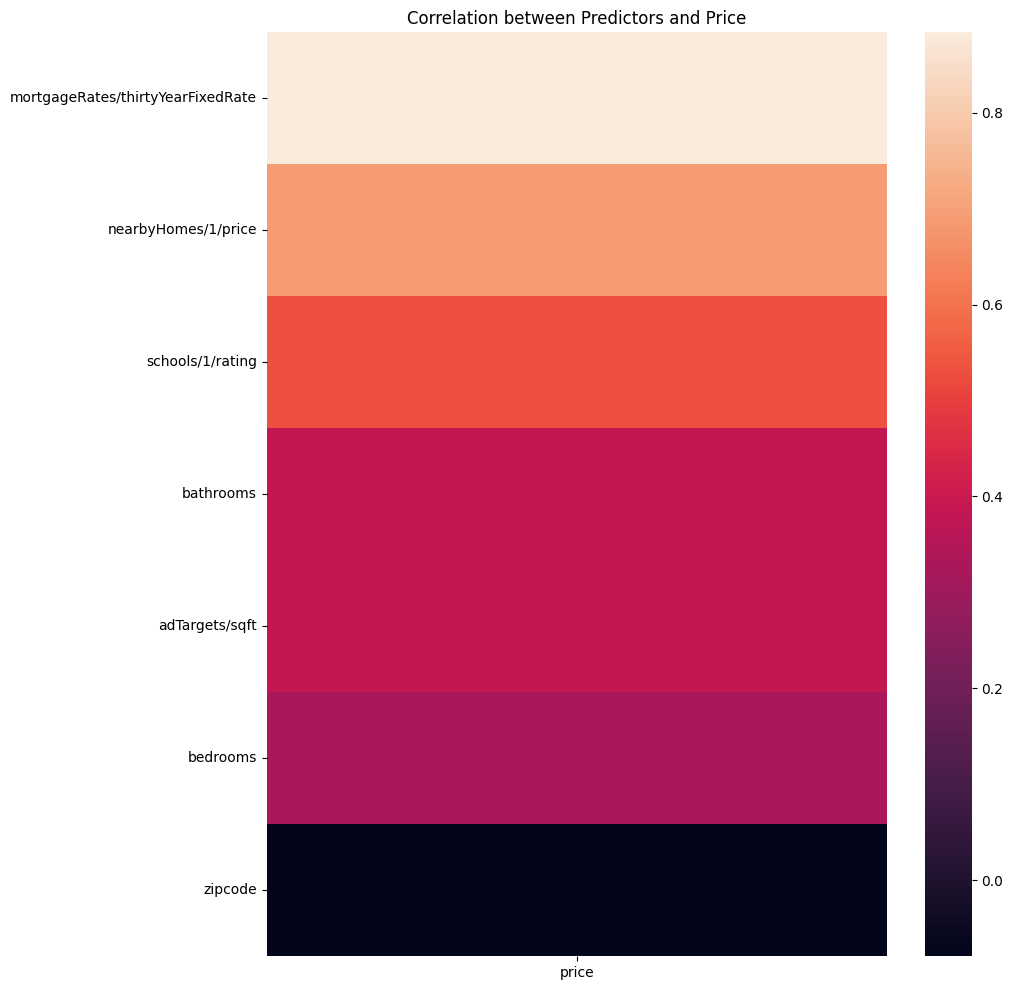

In [20]:
corr_matrix = df[predictors].corr(numeric_only = True)

price_corr = corr_matrix[['price']].sort_values(by=['price'],ascending=False).drop('price')
# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(price_corr, annot = False)
plt.title('Correlation between Predictors and Price')
plt.show()
#looking at coorelation in order to remove variables, as the first polynomial regression was way overfit

In [21]:
#bedrooms, photocount, yearbuilt, schools/0/distance, propertytaxrate, zipcode

In [21]:
new_df = df[predictors].dropna().reset_index()
new_df.shape

(1598, 11)

In [22]:
new_df = new_df.drop(columns = 'index')

In [23]:
new_df['state'].value_counts()

state
CA    1598
Name: count, dtype: int64

In [24]:
new_df.describe

<bound method NDFrame.describe of       schools/1/rating  mortgageRates/thirtyYearFixedRate  \
0                  9.0                              6.194   
1                  9.0                              6.194   
2                  8.0                              6.194   
3                  9.0                              6.194   
4                  7.0                              6.194   
...                ...                                ...   
1593               7.0                              5.879   
1594               7.0                              5.527   
1595               4.0                              5.879   
1596               4.0                              5.527   
1597               3.0                              5.879   

      nearbyHomes/1/price  bathrooms       homeType state  adTargets/sqft  \
0               2700000.0        2.0          CONDO    CA          1493.0   
1               1870600.0        3.0  SINGLE_FAMILY    CA          2163.0   
2 

In [25]:
new_df.head()

,schools/1/rating,mortgageRates/thirtyYearFixedRate,nearbyHomes/1/price,bathrooms,homeType,state,adTargets/sqft,zipcode,bedrooms,price
0,9.0,6.194,2700000.0,2.0,CONDO,CA,1493.0,92037,2.0,1600000
1,9.0,6.194,1870600.0,3.0,SINGLE_FAMILY,CA,2163.0,92130,4.0,2050000
2,8.0,6.194,2295500.0,3.0,SINGLE_FAMILY,CA,3472.0,92127,5.0,2340000
3,9.0,6.194,1250000.0,2.0,CONDO,CA,1975.0,92075,3.0,1625000
4,7.0,6.194,1565100.0,4.0,SINGLE_FAMILY,CA,4283.0,92009,4.0,1642000


In [26]:
#new_df = pd.get_dummies(new_df)

In [27]:
new_df.shape

(1598, 10)

In [28]:
unique_df = new_df.drop_duplicates()
unique_df.shape

(1589, 10)

In [29]:
new_df.head()

,schools/1/rating,mortgageRates/thirtyYearFixedRate,nearbyHomes/1/price,bathrooms,homeType,state,adTargets/sqft,zipcode,bedrooms,price
0,9.0,6.194,2700000.0,2.0,CONDO,CA,1493.0,92037,2.0,1600000
1,9.0,6.194,1870600.0,3.0,SINGLE_FAMILY,CA,2163.0,92130,4.0,2050000
2,8.0,6.194,2295500.0,3.0,SINGLE_FAMILY,CA,3472.0,92127,5.0,2340000
3,9.0,6.194,1250000.0,2.0,CONDO,CA,1975.0,92075,3.0,1625000
4,7.0,6.194,1565100.0,4.0,SINGLE_FAMILY,CA,4283.0,92009,4.0,1642000


In [30]:

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer, OneHotEncoder #Z-score variables, Polynomial
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

In [31]:
predictors = new_df.columns.tolist()
contin = new_df.columns.tolist()
len(predictors)

10

In [32]:
predictors.remove('price')
contin.remove('state')
contin.remove('homeType')
contin.remove('price')
cat = ['state', 'homeType']

In [33]:
len(predictors)

9

In [34]:
len(contin)

7

In [35]:
X = new_df[predictors]
y = new_df["price"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
# z score
z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(handle_unknown='ignore'), cat),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                #("poly", PolynomialFeatures(degree = 3)), #any number of polynomials added made the R2 unreasonable, but the model is still not sufficient
                ("linearregression", lr)])

In [36]:
duplicated_columns = new_df.columns[new_df.columns.duplicated()]
print(duplicated_columns)

Index([], dtype='object')


In [37]:

# fit
pipe.fit(X_train,y_train)


# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))
#R2 is way too high

Train MSE :  39250433026.51154
Train MAE :  133192.0623225605
Train MAPE:  39250433026.51154
Train R2  :  0.9014743776391912
Test MSE  :  28377258020.013744
Test MAE  :  120595.6993933369
Test MAPE :  28377258020.013744
Test R2  :  0.9193598517559137


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

In [39]:
# validation
kf = KFold(11)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
r2 = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))
    

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))
    
    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train R2s:", r2["train"])
print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

#kfolds reduces variance and increases bias, essentially reducing th complexity

Train MSEs: [31851414537.41628, 31468816243.446182, 36571824945.68233, 33991275068.695763, 38859000637.25223, 39328559853.832634, 39407526296.25926, 39397074182.775375, 36293536806.950294, 37041734765.91039, 36382213431.67376]
Test MSEs : [90126071170.64725, 95853724943.08441, 40137722830.7706, 70525916351.71947, 16989048856.719362, 11228508865.844656, 10969934686.183357, 10404745864.685125, 47177131636.98021, 40460650300.534676, 51720548326.23013]
Train MSE : 36417543342.71768
Test MSE  : 44144909439.39993
Train R2s: [0.9042262199405589, 0.9071887796417218, 0.8998187100776562, 0.9059419651035734, 0.9028724830126993, 0.9010016303738024, 0.9018724833535181, 0.9010382013362939, 0.9113519582021554, 0.9126799857876009, 0.9135516874815075]
Test R2s : [0.3629375928065296, 0.4121507917125825, 0.6614814047050341, 0.8678228485271939, -1.7651808332072791, -1.1175114085561022, -1.2495991192687468, -1.099765091484496, -0.0997732703742844, -0.27704671252351254, -5.648580790817369]
Train R2 : 0.9055

trying tree models now

In [40]:
# models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # random forest
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [41]:
new_df['state'] = new_df["state"].astype("category")
new_df['homeType'] = new_df["homeType"].astype("category")
new_df['zipcode'] = new_df['zipcode'].astype("category")

In [42]:
predictors

['schools/1/rating',
 'mortgageRates/thirtyYearFixedRate',
 'nearbyHomes/1/price',
 'bathrooms',
 'homeType',
 'state',
 'adTargets/sqft',
 'zipcode',
 'bedrooms']

In [43]:
new_df.dtypes

schools/1/rating                      float64
mortgageRates/thirtyYearFixedRate     float64
nearbyHomes/1/price                   float64
bathrooms                             float64
homeType                             category
state                                category
adTargets/sqft                        float64
zipcode                              category
bedrooms                              float64
price                                   int64
dtype: object

In [44]:
X = new_df[predictors]
y = new_df["price"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [45]:
xgb = xg.XGBRegressor(n_estimators = 1000, max_depth = 3, random_state = 101, booster = 'gbtree', learning_rate = 0.01, enable_categorical=True)

xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
mean_squared_error(y_test, xgb_predictions)

15247603239.71513

performing cross validation

In [46]:
# model validation
xgb = xg.XGBRegressor(n_estimators = 1000, max_depth = 3, random_state = 101, booster = 'gbtree', learning_rate = 0.01, enable_categorical=True)
kf = KFold(n_splits = 11)
results = cross_val_score(xgb, X, y, cv=kf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    xgb.fit(X_train,y_train)

    # predict
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))
    
    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

#print("Train MSEs:", mse["train"])
#print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

#print("Train MAEs:", mae["train"])
#print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

#print("Train MAPEs:", mape["train"])
#print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

#print("Train R2s:", r2["train"])
#print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

Accuracy: 48.41% (41.83%)
Train MSE : 9709700632.433779
Test MSE  : 22958207069.282887
Train MAE : 66247.01577585895
Test MAE  : 98402.82979398375
Train MAPE : 0.08267667410711345
Test MAPE  : 0.11566128771003212
Train R2 : 0.9749424403364008
Test R2  : 0.4840842431241816


early stopping on n_estimators

In [47]:
xgb = xg.XGBRegressor(n_estimators = 1000, max_depth = 3, random_state = 101, booster = 'gbtree', learning_rate = 0.01, enable_categorical=True, eval_metric = "rmse", early_stopping_rounds=50,)
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Make predictions and evaluate
y_pred = xgb.predict(X_test)
val_error = mean_squared_error(y_test, y_pred)
print(f"Validation error: {val_error}")

[0]	validation_0-rmse:279120.98410
[1]	validation_0-rmse:276777.00385
[2]	validation_0-rmse:274464.35370
[3]	validation_0-rmse:272182.78571
[4]	validation_0-rmse:269931.99787
[5]	validation_0-rmse:267711.74558
[6]	validation_0-rmse:265521.75544
[7]	validation_0-rmse:263336.01543
[8]	validation_0-rmse:261234.95954
[9]	validation_0-rmse:259107.18455
[10]	validation_0-rmse:257061.96839
[11]	validation_0-rmse:254991.16376
[12]	validation_0-rmse:253000.83422
[13]	validation_0-rmse:250957.83986
[14]	validation_0-rmse:249049.21078
[15]	validation_0-rmse:247062.00319
[16]	validation_0-rmse:245205.41635
[17]	validation_0-rmse:243272.98871
[18]	validation_0-rmse:241467.47738
[19]	validation_0-rmse:239588.83974
[20]	validation_0-rmse:237833.45988
[21]	validation_0-rmse:235948.07518
[22]	validation_0-rmse:234218.35532
[23]	validation_0-rmse:232387.30981
[24]	validation_0-rmse:230702.51185
[25]	validation_0-rmse:228990.90117
[26]	validation_0-rmse:227294.45451
[27]	validation_0-rmse:225632.96690
[2

[225]	validation_0-rmse:125297.86541
[226]	validation_0-rmse:125159.33805
[227]	validation_0-rmse:125105.45732
[228]	validation_0-rmse:124897.31694
[229]	validation_0-rmse:124871.18558
[230]	validation_0-rmse:124778.50037
[231]	validation_0-rmse:124730.67040
[232]	validation_0-rmse:124650.53148
[233]	validation_0-rmse:124615.25943
[234]	validation_0-rmse:124421.11617
[235]	validation_0-rmse:124367.30066
[236]	validation_0-rmse:124298.26658
[237]	validation_0-rmse:124259.12562
[238]	validation_0-rmse:124233.20507
[239]	validation_0-rmse:124114.44979
[240]	validation_0-rmse:123994.66267
[241]	validation_0-rmse:123858.40328
[242]	validation_0-rmse:123816.00067
[243]	validation_0-rmse:123701.48787
[244]	validation_0-rmse:123679.81719
[245]	validation_0-rmse:123647.00918
[246]	validation_0-rmse:123537.36870
[247]	validation_0-rmse:123470.99717
[248]	validation_0-rmse:123341.98341
[249]	validation_0-rmse:123289.55259
[250]	validation_0-rmse:123266.99342
[251]	validation_0-rmse:123204.29667
[

[447]	validation_0-rmse:115670.09021
[448]	validation_0-rmse:115594.43667
[449]	validation_0-rmse:115610.50163
[450]	validation_0-rmse:115618.88304
[451]	validation_0-rmse:115560.85067
[452]	validation_0-rmse:115586.68162
[453]	validation_0-rmse:115591.21329
[454]	validation_0-rmse:115591.92921
[455]	validation_0-rmse:115518.14666
[456]	validation_0-rmse:115526.59324
[457]	validation_0-rmse:115551.82019
[458]	validation_0-rmse:115495.45685
[459]	validation_0-rmse:115500.92154
[460]	validation_0-rmse:115509.07892
[461]	validation_0-rmse:115437.23519
[462]	validation_0-rmse:115449.16344
[463]	validation_0-rmse:115473.75958
[464]	validation_0-rmse:115481.12091
[465]	validation_0-rmse:115410.08495
[466]	validation_0-rmse:115438.96130
[467]	validation_0-rmse:115463.79931
[468]	validation_0-rmse:115469.14526
[469]	validation_0-rmse:115494.03144
[470]	validation_0-rmse:115453.40069
[471]	validation_0-rmse:115477.28164
[472]	validation_0-rmse:115472.34078
[473]	validation_0-rmse:115499.92841
[

[669]	validation_0-rmse:113463.97567
[670]	validation_0-rmse:113460.08277
[671]	validation_0-rmse:113463.75466
[672]	validation_0-rmse:113478.21716
[673]	validation_0-rmse:113434.00907
[674]	validation_0-rmse:113461.73850
[675]	validation_0-rmse:113476.45084
[676]	validation_0-rmse:113477.40819
[677]	validation_0-rmse:113483.62905
[678]	validation_0-rmse:113439.97483
[679]	validation_0-rmse:113448.62310
[680]	validation_0-rmse:113432.34627
[681]	validation_0-rmse:113433.36620
[682]	validation_0-rmse:113437.03666
[683]	validation_0-rmse:113451.97364
[684]	validation_0-rmse:113458.17074
[685]	validation_0-rmse:113459.25091
[686]	validation_0-rmse:113440.11691
[687]	validation_0-rmse:113436.81936
[688]	validation_0-rmse:113446.02233
[689]	validation_0-rmse:113408.99483
[690]	validation_0-rmse:113415.19242
[691]	validation_0-rmse:113374.60448
[692]	validation_0-rmse:113366.94180
[693]	validation_0-rmse:113370.59305
[694]	validation_0-rmse:113371.69065
[695]	validation_0-rmse:113353.06792
[

In [48]:
xgb = xg.XGBRegressor(n_estimators = 757, max_depth = 3, random_state = 101, booster = 'gbtree', learning_rate = 0.01, enable_categorical=True)

# model validation
kf = KFold(n_splits = 11)
results = cross_val_score(xgb, X, y, cv=kf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    xgb.fit(X_train,y_train)

    # predict
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))
    
    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train MAEs:", mae["train"])
print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

print("Train MAPEs:", mape["train"])
print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

print("Train R2s:", r2["train"])
print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

Accuracy: 47.97% (41.91%)
Train MSEs: [9172725839.908022, 7649824122.917794, 10124718210.026833, 9675424203.131369, 11824995219.222143, 12039125685.423603, 12097998594.483097, 12247631157.008461, 11973495245.467756, 11001566580.67031, 11543513672.463453]
Test MSEs : [55669376818.307335, 72680977409.8651, 29294685080.112263, 46330736447.23217, 5790716720.146049, 2248544593.7104006, 2538280030.4028893, 1600946155.083284, 5870039048.822289, 17571528146.467194, 12825018850.149797]
Train MSE : 10850092593.702076
Test MSE  : 22947349936.390797
Train MAEs: [62565.997116046834, 59871.44228865358, 66902.45003658747, 66417.3208017894, 72955.35819210255, 74411.61171928768, 74433.7240407777, 75515.31371515829, 73603.9213050585, 68922.4365214212, 71780.4694059704]
Test MAEs : [182120.67765410958, 224275.63698630137, 141909.07876712328, 141257.5709051724, 52465.57769396552, 33951.275969827584, 38101.567456896555, 30405.849137931036, 43158.08534482759, 101972.74461206897, 94979.74310344827]
Train MAE

<Figure size 1800x1200 with 0 Axes>

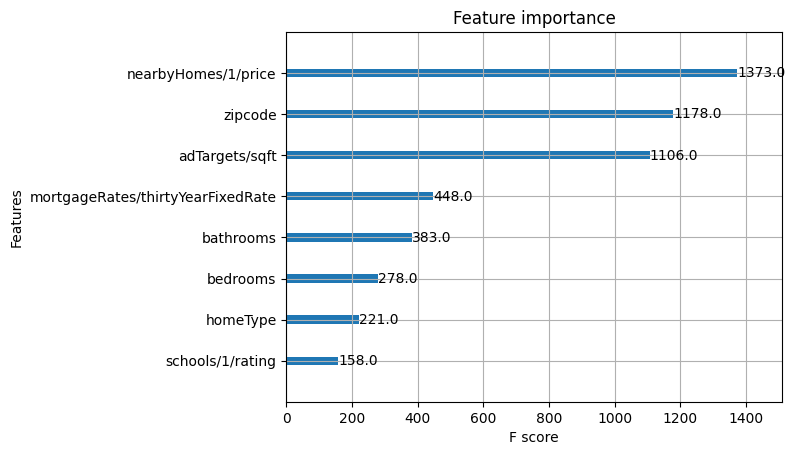

In [49]:
from xgboost import plot_importance
plt.figure(figsize=(18,12))
plot_importance(xgb)
plt.show()

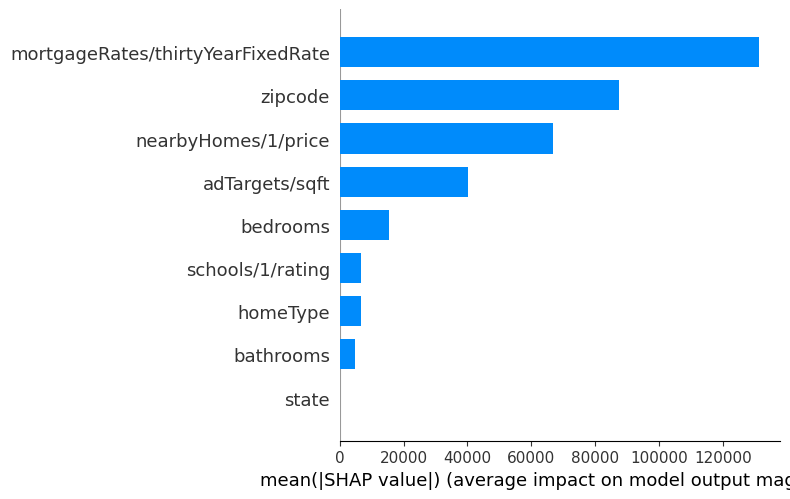

In [50]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [67]:
predictors = ['schools/1/rating',
'mortgageRates/thirtyYearFixedRate',
'nearbyHomes/1/price',
'bathrooms',
'bedrooms',
'adTargets/sqft',
'zipcode',
'state', 
'homeType'
]

In [68]:
final_df = new_df
final_df.head()

,schools/1/rating,mortgageRates/thirtyYearFixedRate,nearbyHomes/1/price,bathrooms,homeType,state,adTargets/sqft,zipcode,bedrooms,price
0,9.0,6.194,2700000.0,2.0,CONDO,CA,1493.0,92037,2.0,1600000
1,9.0,6.194,1870600.0,3.0,SINGLE_FAMILY,CA,2163.0,92130,4.0,2050000
2,8.0,6.194,2295500.0,3.0,SINGLE_FAMILY,CA,3472.0,92127,5.0,2340000
3,9.0,6.194,1250000.0,2.0,CONDO,CA,1975.0,92075,3.0,1625000
4,7.0,6.194,1565100.0,4.0,SINGLE_FAMILY,CA,4283.0,92009,4.0,1642000


In [69]:
final_df[predictors]

,schools/1/rating,mortgageRates/thirtyYearFixedRate,nearbyHomes/1/price,bathrooms,bedrooms,adTargets/sqft,zipcode,state,homeType
0,9.0,6.194,2700000.0,2.0,2.0,1493.0,92037,CA,CONDO
1,9.0,6.194,1870600.0,3.0,4.0,2163.0,92130,CA,SINGLE_FAMILY
2,8.0,6.194,2295500.0,3.0,5.0,3472.0,92127,CA,SINGLE_FAMILY
3,9.0,6.194,1250000.0,2.0,3.0,1975.0,92075,CA,CONDO
4,7.0,6.194,1565100.0,4.0,4.0,4283.0,92009,CA,SINGLE_FAMILY
...,...,...,...,...,...,...,...,...,...
1593,7.0,5.879,650000.0,2.0,2.0,1182.0,92128,CA,TOWNHOUSE
1594,7.0,5.527,708900.0,3.0,3.0,2528.0,93711,CA,SINGLE_FAMILY
1595,4.0,5.879,719900.0,4.0,4.0,2605.0,93711,CA,SINGLE_FAMILY
1596,4.0,5.527,528700.0,3.0,4.0,2272.0,93711,CA,SINGLE_FAMILY


In [70]:

X = final_df[predictors]
y = final_df["price"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [71]:
xgb = xg.XGBRegressor(n_estimators = 753, max_depth = 3, random_state = 101, booster = 'gbtree', 
                      learning_rate = 0.01, enable_categorical=True, min_child_weight = 8,
                     gamma=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1.0,)

# model validation
kf = KFold(n_splits = 9)
results = cross_val_score(xgb, X, y, cv=kf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    xgb.fit(X_train,y_train)

    # predict
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))
    
    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

#print("Train MSEs:", mse["train"])
#print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

#print("Train MAEs:", mae["train"])
#print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

#print("Train MAPEs:", mape["train"])
#print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

#print("Train R2s:", r2["train"])
#print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

Accuracy: 12.24% (61.06%)
Train MSE : 11939974402.417624
Test MSE  : 24766111318.68765
Train MAE : 71731.70205907895
Test MAE  : 107493.22197739451
Train MAPE : 0.08831234009475572
Test MAPE  : 0.14278190061967538
Train R2 : 0.9690210753017001
Test R2  : 0.1223958929379781


<Figure size 1800x1200 with 0 Axes>

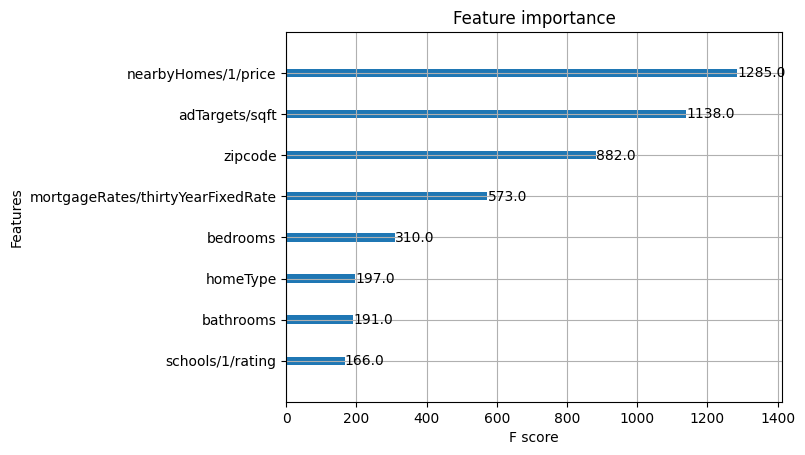

In [72]:
plt.figure(figsize=(18,12))
plot_importance(xgb)
plt.show()

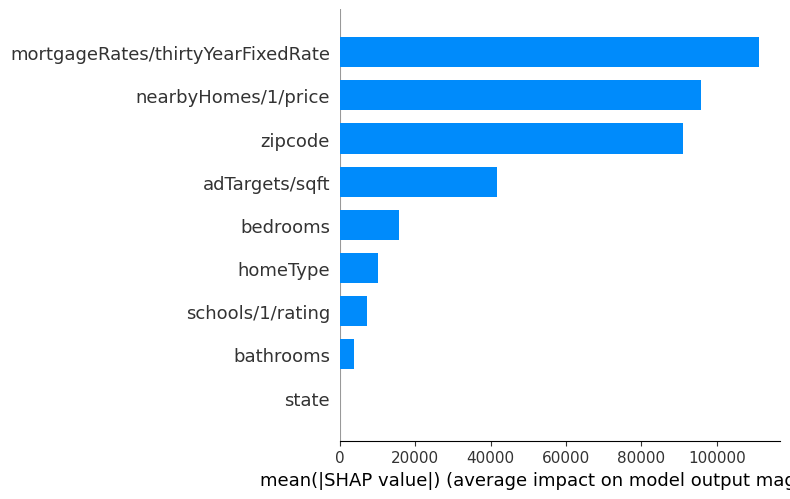

In [73]:
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [74]:
variables = ['schools/1/rating',
'mortgageRates/thirtyYearFixedRate',
'nearbyHomes/1/price',
'bathrooms',
'bedrooms',
'homeType',
'adTargets/sqft',
             'price'
]

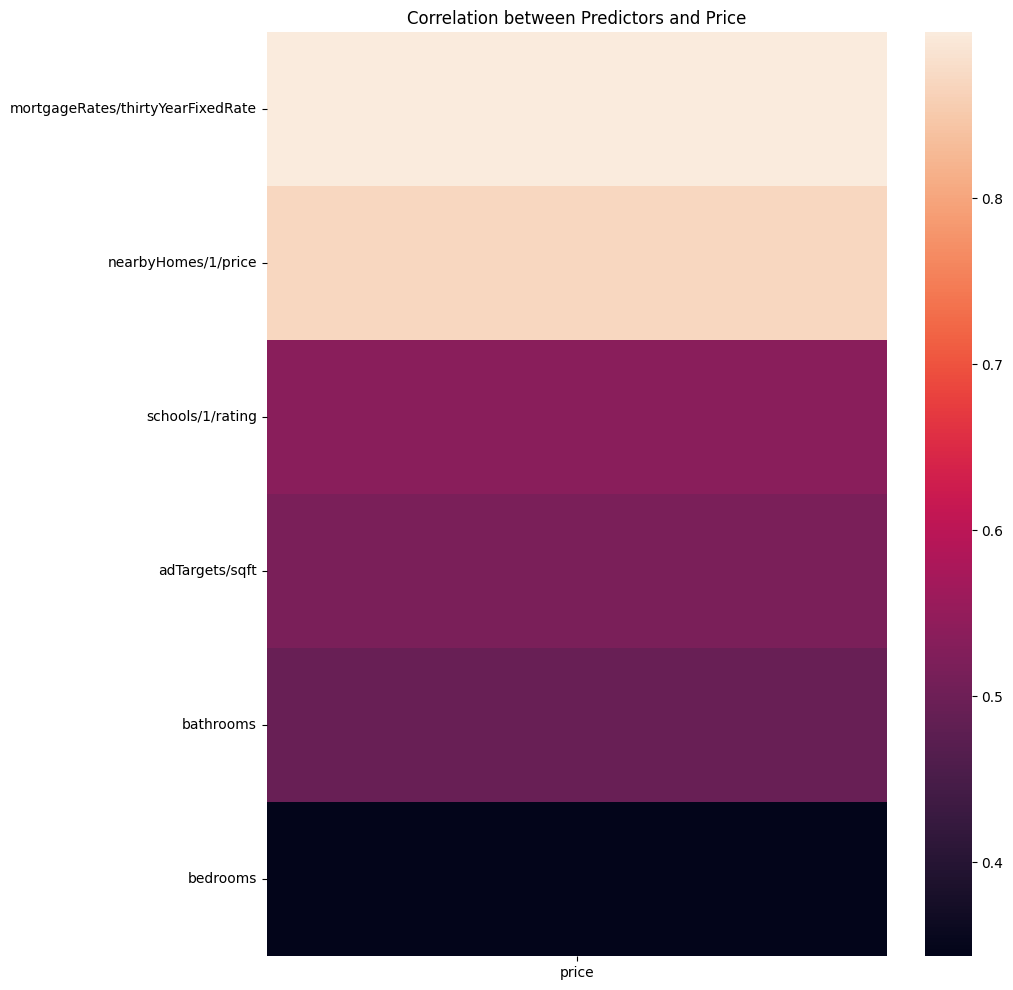

In [75]:
corr_matrix = final_df[variables].corr(numeric_only = True)

price_corr = corr_matrix[['price']].sort_values(by=['price'],ascending=False).drop('price')
# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(price_corr, annot = False)
plt.title('Correlation between Predictors and Price')
plt.show()

In [76]:
final_df.shape

(1598, 10)